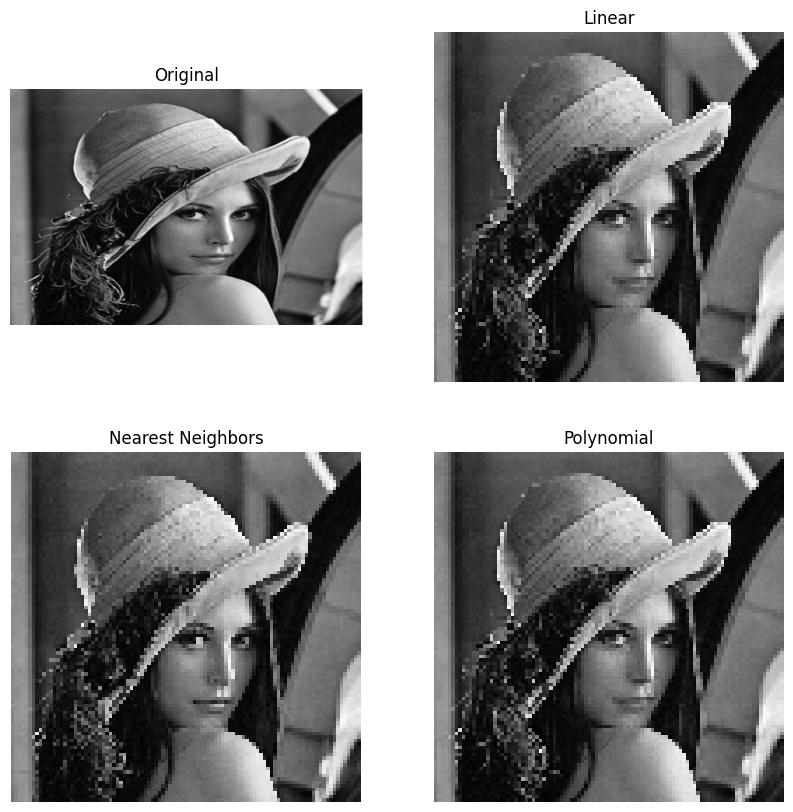

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('/content/Picture 1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Resize using different interpolation methods
linear = cv2.resize(image, (100, 100), interpolation=cv2.INTER_LINEAR)
nearest = cv2.resize(image, (100, 100), interpolation=cv2.INTER_NEAREST)
polynomial = cv2.resize(image, (100, 100), interpolation=cv2.INTER_CUBIC)

# Display the images
images = [image, linear, nearest, polynomial]
titles = ['Original', 'Linear', 'Nearest Neighbors', 'Polynomial']

plt.figure(figsize=(10, 10))
for i in range(len(images)):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.show()


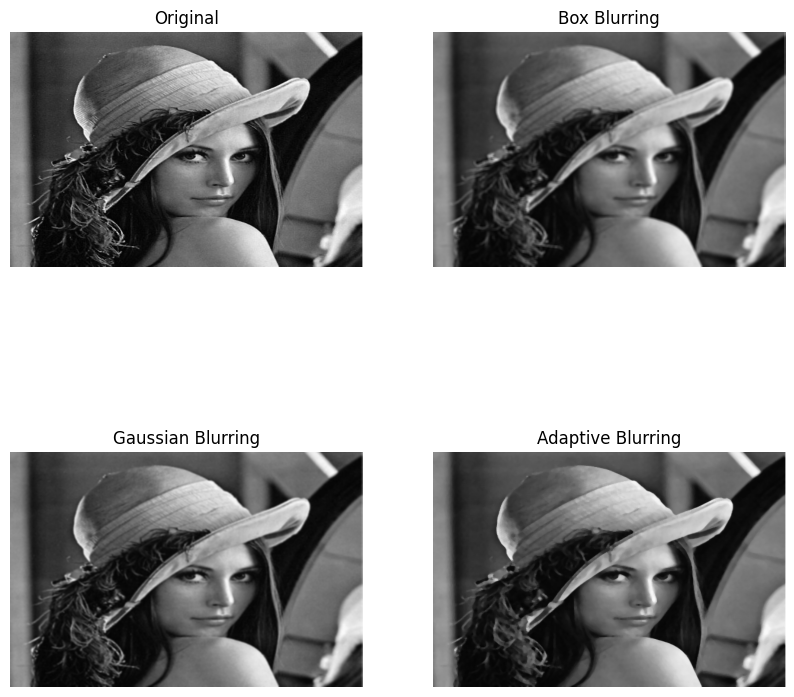

In [2]:
# Box Blurring
box_blur = cv2.blur(image, (5, 5))

# Gaussian Blurring
gaussian_blur = cv2.GaussianBlur(image, (5, 5), 0)

# Adaptive Blurring (similar to Median Blurring)
adaptive_blur = cv2.medianBlur(image, 5)

# Display results
images_blur = [image, box_blur, gaussian_blur, adaptive_blur]
titles_blur = ['Original', 'Box Blurring', 'Gaussian Blurring', 'Adaptive Blurring']

plt.figure(figsize=(10, 10))
for i in range(len(images_blur)):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images_blur[i])
    plt.title(titles_blur[i])
    plt.axis('off')
plt.show()



Support Vector Machine (SVM) Performance Metrics:
Accuracy: 0.9750
Precision: 0.9759
Recall: 0.9750
F1-Score: 0.9749
ROC AUC: 0.9995

Confusion Matrix:
[[36  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  1  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 35  0  0  1  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  1  0 35  0  0]
 [ 0  2  0  0  1  0  0  0 32  0]
 [ 0  0  0  0  0  0  1  2  0 33]]


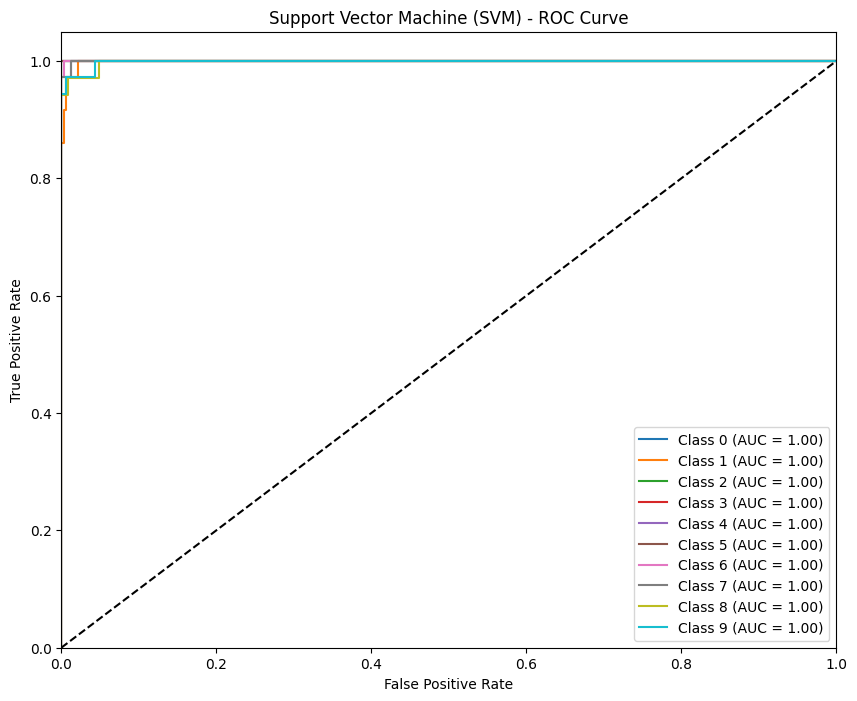


Random Forest Performance Metrics:
Accuracy: 0.9639
Precision: 0.9644
Recall: 0.9639
F1-Score: 0.9636
ROC AUC: 0.9992

Confusion Matrix:
[[35  0  0  0  1  0  0  0  0  0]
 [ 0 35  0  0  0  1  0  0  0  0]
 [ 1  0 34  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  0  1]
 [ 0  0  0  0 36  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  1  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  3  0  0  0  0  0  2 30  0]
 [ 0  0  0  1  0  0  0  1  1 33]]


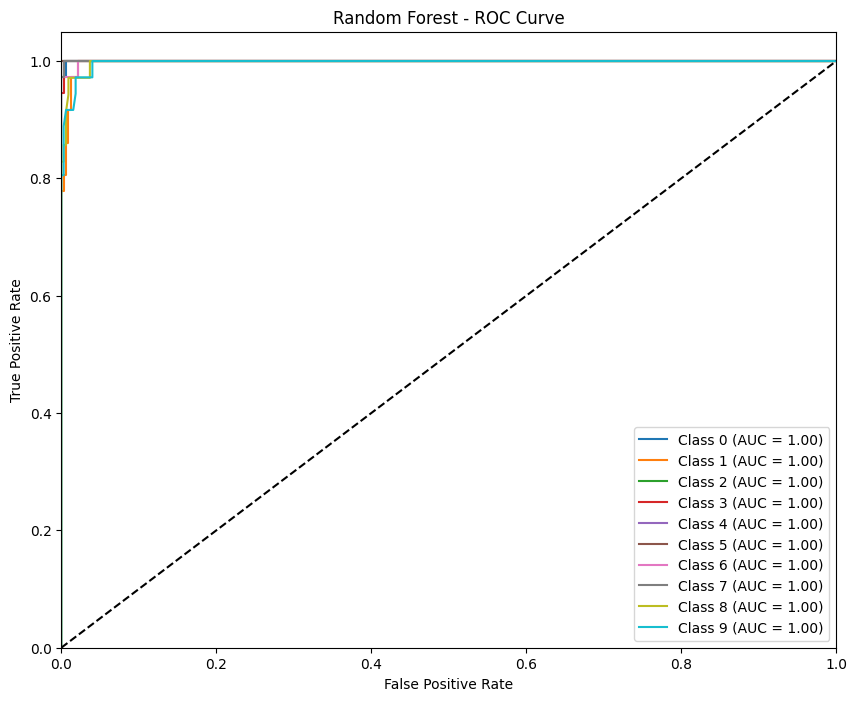

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    auc,
    roc_auc_score,
    classification_report,
)

# Load and preprocess data
digits = load_digits()
X, y = digits.data, digits.target
X_scaled = StandardScaler().fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# SVM Hyperparameter Tuning
svm_params = {
    "C": [0.1, 1, 10],
    "kernel": ["rbf", "linear"],
    "gamma": ["scale", "auto"],
}
svm_grid = GridSearchCV(SVC(probability=True), svm_params, cv=5, scoring="accuracy")
svm_grid.fit(X_train, y_train)

# Random Forest Hyperparameter Tuning
rf_params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
}
rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42), rf_params, cv=5, scoring="accuracy"
)
rf_grid.fit(X_train, y_train)

# Best models
best_svm = svm_grid.best_estimator_
best_rf = rf_grid.best_estimator_

# Final evaluation function
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Binarize the labels for ROC-AUC
    y_test_bin = label_binarize(y_test, classes=np.unique(y))
    roc_auc = roc_auc_score(y_test_bin, y_prob, multi_class="ovr")

    # Print metrics
    print(f"\n{model_name} Performance Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("\nConfusion Matrix:")
    print(conf_matrix)

    # ROC Curve
    plt.figure(figsize=(10, 8))
    for i in range(len(np.unique(y))):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc(fpr, tpr):.2f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{model_name} - ROC Curve")
    plt.legend(loc="lower right")
    plt.show()


# Evaluate SVM
evaluate_model(best_svm, X_test, y_test, "Support Vector Machine (SVM)")

# Evaluate Random Forest
evaluate_model(best_rf, X_test, y_test, "Random Forest")